The purpose of this notebook is to provide a brief introduction to the training data used for mask rcnn, as well as demonstrate tools for subsetting the data for use in testing and evaluation.

In [2]:
import sys
from pycocotools.coco import COCO
from pathlib import Path
import numpy as np
sys.path.append("/mask-rcnn-tensorflow/notebooks/utils/")
from utils.coco import COCOSubsetter
import matplotlib.pyplot as plt
import matplotlib.patches as patches

The annotations are stored in json format. Pycocotools reads and parses these annotations.

COCO is used by pycocotools, while the COCOSubsetter is written specifically for this notebook for the purpose of creating smaller data subsets.

In [3]:
coco_subsetter = COCOSubsetter('/data/')
coco = COCO("/data/annotations/instances_train2017.json")

loading annotations into memory...
Done (t=14.69s)
creating index...
index created!


Start by getting a random image.

In [7]:
image_id = np.random.choice(list(coco_subsetter.images.keys()))
image_id

238117

We can load the image itself by passing the image id to the images attribute in the subsetter.

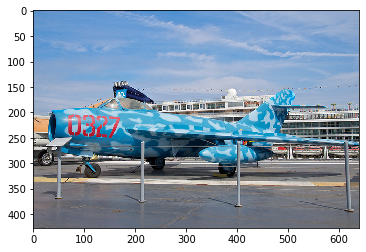

In [8]:
plt.imshow(plt.imread(coco_subsetter.images[image_id]))

The pycocotools lets us apply the ground truth masks to the image.

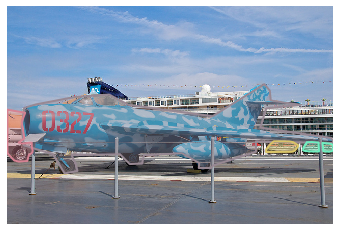

In [9]:
plt.imshow(plt.imread(coco_subsetter.images[image_id]))
plt.axis('off')
annIds = coco.getAnnIds(imgIds=[image_id])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

Pycocotools does not have a utility to display ground truth boxes, but this can be done using the patches module in matplotlib.

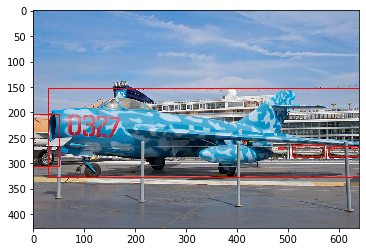

In [10]:
fig,ax = plt.subplots(1)
ax.imshow(plt.imread(coco_subsetter.images[image_id]))
for anno in anns:
    rect = patches.Rectangle((anno['bbox'][0],anno['bbox'][1]),
                             anno['bbox'][2],anno['bbox'][3],
                             linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

## Data Subsetting

The steps below show how to create a small subset of the data. This is useful for debugging.

Start by getting a random subset of 25 images. You can also use pycocotools to specify image ids based on category, or create your own custom list.

In [19]:
# select a subset of images
images_sample = coco_subsetter.random_subset(25)

Place the 25 images and their annotations in a new directory.

In [20]:
coco_subsetter.create_subset(list(images_sample.keys()), '/data/small_sample')

We also might want to create a dataset that repeats a few images. Again, this can be useful for debugging.

First, read back in the image and annotations for the small subset we just created, then run the duplicate dataset function with the number of duplicates, and the new directory to write to.

In [21]:
coco_duplicator = COCOSubsetter('/data/small_sample/')

In [22]:
coco_duplicator.duplicate_dataset(10, '/data/dup_data')